In [90]:
#import all necessary packages and functions.
import csv # read and write csv files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [91]:
def print_first_point(data_file):
    city = data_file.split('-')[0]
    print('\nCity: {}'.format(city))
    
    with open(data_file, 'r') as f_in:

        trip_reader = csv.DictReader(f_in)
        first_trip = next(trip_reader)
        pprint(first_trip)
    return (city, first_trip)

data_files = ['NYC-CitiBike-2016.csv',
              'Chicago-Divvy-2016.csv',
              'Washington-CapitalBikeshare-2016.csv',]
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

In [92]:
def duration_in_mins(datum, city):
    if city == 'NYC':
        duration = float(datum['tripduration'])
    elif city == 'Chicago':
        duration = float(datum['tripduration'])
    else:
        duration = float(datum['Duration (ms)'])/1000
    
    return duration/60
        
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}
for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [93]:
def time_of_trip(datum, city):
    if city == 'NYC':
        month =  datum['starttime'].split('/')[0]
        hour = datum['starttime'].split()[1].split(':')[0]
        day_of_week = datetime.strptime('1/1/2016 00:09:55','%m/%d/%Y %H:%M:%S').strftime('%A')
           
    elif city == 'Chicago':
        month =  datum['starttime'].split('/')[0]
        hour = datum['starttime'].split()[1].split(':')[0]
        day_of_week = datetime.strptime('3/31/2016 23:30','%m/%d/%Y %H:%M').strftime('%A')
         
    else:
        month =  datum['Start date'].split('/')[0]
        hour = datum['Start date'].split()[1].split(':')[0]
        day_of_week = datetime.strptime('3/31/2016 22:57','%m/%d/%Y %H:%M').strftime('%A')
        
    return(int(month), int(hour), day_of_week)

tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [94]:
def type_of_user(datum, city):
    if city =='NYC':
        user_type = datum['usertype']
    
    elif city =='Chicago':
        user_type = datum['usertype']
       
    else :
        if datum['Member Type'] == 'Registered':
            user_type = 'Subscriber'
        else :
            user_type = 'Customer'
    return(user_type)
            

tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

In [95]:
def condense_data(in_file, out_file, city):
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        trip_reader = list(csv.DictReader(f_in))

        for row in trip_reader:
            new_point = {}
            month, hour, day_of_week = time_of_trip(row, city)
            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'] = month
            new_point['hour'] = hour
            new_point['day_of_week'] = day_of_week
            new_point['user_type'] = type_of_user(row, city)

            f_out.write("{},".format(new_point['duration']))
            f_out.write("{},".format(new_point['month']))
            f_out.write("{},".format(new_point['hour']))
            f_out.write("{},".format(new_point['day_of_week']))
            f_out.write("{}\n".format(new_point['user_type']))

In [96]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': 'Washington-CapitalBikeshare-2016.csv',
                            'out_file': 'Washington-2016-Summary.csv'},
             'Chicago': {'in_file': 'Chicago-Divvy-2016.csv',
                         'out_file': 'Chicago-2016-Summary.csv'},
             'NYC': {'in_file': 'NYC-CitiBike-2016.csv',
                     'out_file': 'NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


In [97]:
def number_of_trips(filename):
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)

        no_subscribers = 0
        no_customers = 0
   
        for row in reader:
            if row['user_type'] == 'Subscriber':
                no_subscribers += 1
            else:
                no_customers += 1
    
        total = no_subscribers + no_customers
        return(no_subscribers, no_customers, total)

In [98]:
data_file = 'NYC-2016-Summary.csv'
print(number_of_trips(data_file))

data_file = 'Chicago-2016-Summary.csv'
print(number_of_trips(data_file))

data_file = 'Washington-2016-Summary.csv'
print(number_of_trips(data_file))

(245896, 30902, 276798)
(54982, 17149, 72131)
(51753, 14573, 66326)


In [99]:
def avg_trip_length(filename) :
    avg_time = 0
    total_time = 0
    trip_count = 0
    long_trip = 0
    percent_long_trip = 0
    
    with open(filename,'r') as f_in :
        avgdur_reader = csv.DictReader(f_in)
        
        for row in avgdur_reader :
            time = float(row.get('duration'))
            total_time += time
            if time > 30 :
                long_trip += 1
            trip_count += 1   
        avg_time = float(total_time/trip_count)
        percent_long_trip = float((long_trip/trip_count)*100)
        return(avg_time ,percent_long_trip) 

In [100]:
data_file_N = 'NYC-2016-Summary.csv'
data_file_C = 'Chicago-2016-Summary.csv'
data_file_W = 'Washington-2016-Summary.csv'

avg_time ,percent_long_trip = avg_trip_length(data_file_N)
print("NYC: Avg Len:{} min, %age of long trip:{}".format(avg_time ,percent_long_trip))

avg_time, percent_long_trip = avg_trip_length(data_file_C)
print("Chicago: Avg Len:{} min, %age of long trip:{}".format(avg_time ,percent_long_trip))

avg_time, percent_long_trip = avg_trip_length(data_file_W)
print("Washington: Avg Len:{} min, %age of long trip:{}".format(avg_time ,percent_long_trip))

NYC: Avg Len:15.81259299802294 min, %age of long trip:7.3024371563378345
Chicago: Avg Len:16.563629368787335 min, %age of long trip:8.332062497400562
Washington: Avg Len:18.93287355913721 min, %age of long trip:10.83888671109369


In [101]:
def avg_trip_length(filename) :
    avg_time = 0
    total_time = 0
    trip_count = 0
    long_trip = 0
    percent_long_trip = 0
    
    with open(filename,'r') as f_in :
        avgdur_reader = csv.DictReader(f_in)

        for row in avgdur_reader :
            time = float(row.get('duration'))
            total_time += time

            if time > 30 :
                long_trip += 1
            trip_count += 1   

        avg_time = float(total_time/trip_count)
        percent_long_trip = float((long_trip/trip_count)*100)
        return(avg_time ,percent_long_trip) 

In [102]:
data_file_N = 'NYC-2016-Summary.csv'
data_file_C = 'Chicago-2016-Summary.csv'
data_file_W = 'Washington-2016-Summary.csv'

avg_time ,percent_long_trip = avg_trip_length(data_file_N)
print("NYC: Avg Len:{} min, %age of long trip:{}".format(avg_time ,percent_long_trip))

avg_time, percent_long_trip = avg_trip_length(data_file_C)
print("Chicago: Avg Len:{} min, %age of long trip:{}".format(avg_time ,percent_long_trip))

avg_time, percent_long_trip = avg_trip_length(data_file_W)
print("Washington: Avg Len:{} min, %age of long trip:{}".format(avg_time ,percent_long_trip))


NYC: Avg Len:15.81259299802294 min, %age of long trip:7.3024371563378345
Chicago: Avg Len:16.563629368787335 min, %age of long trip:8.332062497400562
Washington: Avg Len:18.93287355913721 min, %age of long trip:10.83888671109369


In [103]:
def user_trip_duration(filename):
    duration_of_customer = 0
    duration_of_subscriber = 0
    trip_cust = 0
    trip_subs = 0
    
    with open(filename,'r') as f_in :
        userdur_reader = csv.DictReader(f_in)
        for row in userdur_reader:
            if row.get('user_type') == 'Customer':
                duration_of_customer += float(row['duration'])
                trip_cust += 1
            else:
                duration_of_subscriber += float(row['duration'])
                trip_subs += 1

        avg_customer_trip = (duration_of_customer/trip_cust)
        avg_subscriber_trip = (duration_of_subscriber/trip_subs)
        return(avg_customer_trip ,avg_subscriber_trip)

In [104]:
data_file_N = 'NYC-2016-Summary.csv'
data_file_C = 'Chicago-2016-Summary.csv'
data_file_W = 'Washington-2016-Summary.csv'

avg_customer_trip ,avg_subscriber_trip = user_trip_duration(data_file_N)
print("NYC: Avg cust trip:{} , Avg subs trip:{}".format(avg_customer_trip ,avg_subscriber_trip))

avg_customer_trip, avg_subscriber_trip = user_trip_duration(data_file_C)
print("Chicago: Avg cust trip:{} , Avg subs trip:{}".format(avg_customer_trip ,avg_subscriber_trip))

avg_customer_trip, avg_subscriber_trip = user_trip_duration(data_file_W)
print("Washington: Avg cust trip:{} min, Avg subs trip:{}".format(avg_customer_trip ,avg_subscriber_trip))


NYC: Avg cust trip:32.982004306775025 , Avg subs trip:13.711087074350004
Chicago: Avg cust trip:30.979781133982506 , Avg subs trip:12.067201690250076
Washington: Avg cust trip:41.67803139252976 min, Avg subs trip:12.528120499294745


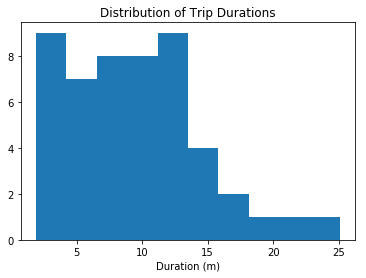

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline 

data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

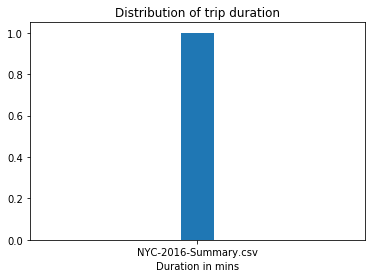

In [106]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
import matplotlib.pyplot as plt
%matplotlib inline

def histogram(filename):
    with open(filename,'r') as f_in :
        r = csv.DictReader(f_in)
        trip = []
        for i in r :
            trip += row['duration']
        return trip

filename = 'NYC-2016-Summary.csv'
plt.hist(filename,bins = 5,rwidth = 0.5)
plt.xlabel("Duration in mins")
plt.title("Distribution of trip duration")
plt.show()


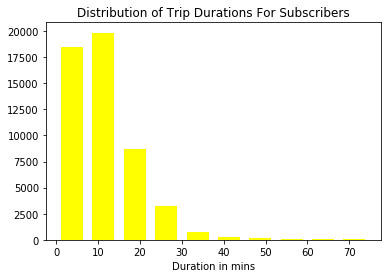

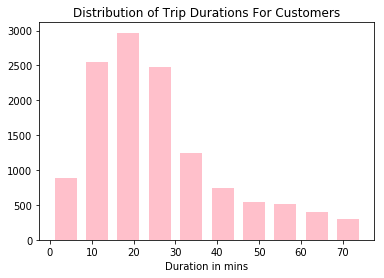

In [107]:
def histogram_subscriber(filename,user_type='Subscriber'):
    with open(filename,'r') as f_in:
        reader=csv.DictReader(f_in)
        duration_list=[]
        for row in reader:
            if row['user_type']==user_type:
                duration_list.append(float(row['duration']))
    return duration_list

filename = 'Washington-2016-Summary.csv'
plt.hist(histogram_subscriber(filename), range=[0,75],rwidth=0.7,color = 'yellow')
plt.title('Distribution of Trip Durations For Subscribers')
plt.xlabel('Duration in mins')
plt.show()

filename = 'Washington-2016-Summary.csv'
plt.hist(histogram_subscriber(filename,user_type='Customer'), range=[0,75],rwidth=0.7,color ='pink')
plt.title('Distribution of Trip Durations For Customers')
plt.xlabel('Duration in mins')
plt.show()

In [108]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

1